数据可视化

(849, 909)


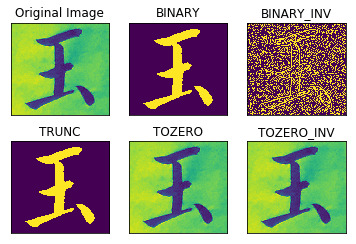

In [37]:
import matplotlib.pyplot as plt 
import cv2 as cv

img = cv.imread('xvvyu.jpg',0)
print(img.shape)
# gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
ret, binary = cv.threshold(img, 100, 255, cv.THRESH_BINARY_INV)
adapt_binary =  cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY_INV, 21, 1)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, binary, adapt_binary, binary, img, img]
# images = [img, binary, img,  binary, img, binary]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## 外接矩形提取

(247, 1, 2)
(247, 1, 2)
(34, 1, 2)
x,y,w,h: 129 49 642 751
roi: (751, 642)
(849, 909)


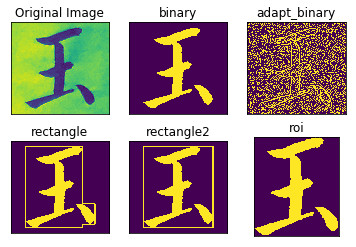

In [38]:
import cv2
import numpy as np

# print(adapt_binary)
contours, hierarchy = cv2.findContours(binary.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]  
print((contours[0].shape) )
x,y,w,h = cv2.boundingRect(cnt)
rectangle = cv2.rectangle(binary.copy(),(x,y),(x+w,y+h),(255,0,0),5)
cnt = contours[1]  
print((contours[0].shape) )
x,y,w,h = cv2.boundingRect(cnt)
rectangle = cv2.rectangle(rectangle,(x,y),(x+w,y+h),(255,0,0),5)

contours, hierarchy = cv2.findContours(rectangle.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]  
print((contours[0].shape) )
x,y,w,h = cv2.boundingRect(cnt)
roi = binary[y:y+h,x:x+w]
print('x,y,w,h:',x,y,w,h)
print('roi:',roi.shape)
# cv2.imshow('roi',roi)
# cv2.waitKey(0)
rectangle=cv2.drawContours(binary.copy(),contours,-1,(255,0,0),10) 
rectangle2 = cv2.rectangle(binary.copy(),(x,y),(x+w,y+h),(255,0,0),10)

print(rectangle2.shape)
titles = ['Original Image','binary','adapt_binary','rectangle','rectangle2','roi']
images = [img, binary, adapt_binary, rectangle, rectangle2, roi]
# images = [img, binary, img,  binary, img, binary]

# cv2.imshow("img", rectangle)
# cv2.waitKey(0)

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## 字模提取

(240, 243)
(349, 1, 2)
(349, 1, 2)
(34, 1, 2)


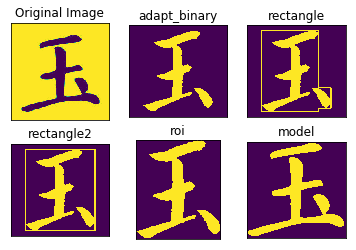

In [39]:
img = cv.imread('modelyu.jpg',0)
print(img.shape)
# gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
def img_2_roi(img):
    _, binary = cv.threshold(img, 100, 255, cv.THRESH_BINARY_INV)
    
    contours, hierarchy = cv2.findContours(binary.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]  
    print((contours[0].shape) )
    x,y,w,h = cv2.boundingRect(cnt)
    rectangle = cv2.rectangle(binary.copy(),(x,y),(x+w,y+h),(255,0,0),5)
    cnt = contours[1]  
    print((contours[0].shape) )
    x,y,w,h = cv2.boundingRect(cnt)
    rectangle = cv2.rectangle(rectangle,(x,y),(x+w,y+h),(255,0,0),5)

    contours, hierarchy = cv2.findContours(rectangle.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]  
    print((contours[0].shape) )
    x,y,w,h = cv2.boundingRect(cnt)
    roi = binary[y:y+h,x:x+w]
    return roi

model = img_2_roi(img)
titles = ['Original Image','adapt_binary','rectangle','rectangle2','roi','model']
images = [img, binary, rectangle, rectangle2, roi, model]
# images = [img, binary, img,  binary, img, binary]

# cv2.imshow("img", rectangle)
# cv2.waitKey(0)

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## 大小缩放及中点匹配

roi.shape (751, 642) model.shape (194, 199) roi.unique: [  0 255] model.unique: [  0 255]
120405.0 8894.0 3.679371994986433
120405.0 120441.0
roi.shape (751, 642) model.shape (713, 732) roi.unique: [  0 255] model.unique: [  0 255]
(771, 752) (771, 752)
[  0 255]


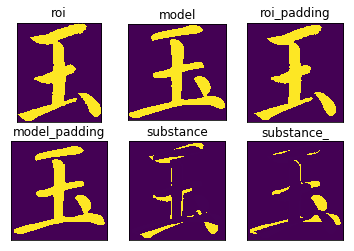

In [40]:
import math
print('roi.shape',roi.shape,'model.shape',model.shape, 'roi.unique:',np.unique(roi), 'model.unique:',np.unique(model))
scale_percent = 400       # percent of original size

#保持纵横比缩放scale_percent%
def img_resize(img, scale_percent):
    width = int(img.shape[1] * scale_percent)
    height = int(img.shape[0] * scale_percent)
    dim = (width, height)
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return resized


num_roi = roi.sum()/255
num_model = model.sum()/255
scale_percent = math.sqrt(num_roi/num_model)
print(num_roi, num_model, scale_percent)

resized_model = img_resize(model,scale_percent)  #插值后不再是二值图像
ret, resized_model = cv.threshold(resized_model, 110, 255, cv.THRESH_BINARY)

num_roi = roi.sum()/255
num_model = resized_model.sum()/255
print(num_roi, num_model)
print('roi.shape',roi.shape,'model.shape',resized_model.shape, 'roi.unique:',np.unique(roi), 'model.unique:',np.unique(resized_model))

padding_size = [0,0]
padding_size[0] = max(roi.shape[0],resized_model.shape[0])+20
padding_size[1] = max(roi.shape[1],resized_model.shape[1])+20


roi_padding = np.lib.pad(roi, ((int((padding_size[0]-roi.shape[0])/2), int((padding_size[0]-roi.shape[0])-int((padding_size[0]-roi.shape[0])/2))),
                     (int((padding_size[1]-roi.shape[1])/2), int((padding_size[1]-roi.shape[1])-int((padding_size[1]-roi.shape[1])/2)))), 'constant', constant_values=np.array(((0, 0),(0, 0))))
model_padding = np.lib.pad(resized_model, ((int((padding_size[0]-resized_model.shape[0])/2), int((padding_size[0]-resized_model.shape[0])-int((padding_size[0]-resized_model.shape[0])/2))),
                     (int((padding_size[1]-resized_model.shape[1])/2), int((padding_size[1]-resized_model.shape[1])-int((padding_size[1]-resized_model.shape[1])/2)))), 'constant', constant_values=np.array(((0, 0),(0, 0))))
print(roi_padding.shape,model_padding.shape)

substance =  roi_padding - model_padding
substance_ =  model_padding - roi_padding
print(np.unique(roi_padding))

titles = ['roi','model','roi_padding','model_padding','substance','substance_']
images = [ roi, model, roi_padding, model_padding, substance, substance_]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## IOU计算

In [41]:
def get_iou(target,prediction):
    intersection = np.logical_and(target, prediction) 
    union = np.logical_or(target, prediction) 
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score
iou = get_iou(model_padding, roi_padding)
iou2 = get_iou(roi_padding, model_padding)
print(iou,iou2)


0.5175129638147324 0.5175129638147324


## 边缘检测 

In [55]:
def SobelOperator(roi,operator_type):
    if operator_type == "horizontal":
        sobel_operator = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    elif operator_type == "vertical":
        sobel_operator = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    else:
        raise("type Error")
    result = np.abs(np.sum(roi*sobel_operator))
    return result
    
def SobelAlogrithm(image,operator_type):
    new_image = np.zeros(image.shape)
    image = cv2.copyMakeBorder(image,1,1,1,1,cv2.BORDER_DEFAULT)
    for i in range(1,image.shape[0]-1):
        for j in range(1,image.shape[1]-1):
            new_image[i-1,j-1] = SobelOperator(image[i-1:i+2,j-1:j+2],operator_type)
    new_image = new_image*(255/np.max(image))
    return new_image.astype(np.uint8)
size = int(model_padding.shape[0]/30)
if size%2 == 0:
    size += 1
border =  cv.adaptiveThreshold(model_padding, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY_INV, size, 1)

## 可视化

(771, 752)


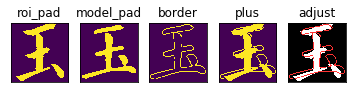

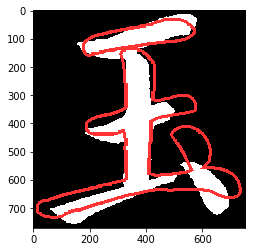

In [56]:
from skimage import color, img_as_float
from skimage.exposure import adjust_gamma

plus = roi_padding + border

model_line = np.argwhere (border == 255)
gray_img = img_as_float(roi_padding)
print(gray_img.shape)
image = adjust_gamma(color.gray2rgb(gray_img), 0.65) 
adjust = image.copy()
red_multiplier = [1, 0.2, 0.2]

for i in range(len(model_line)):
    adjust[model_line[i][0]][model_line[i][1]] = red_multiplier

titles = ['roi_pad','model_pad','border','plus','adjust','substance_']
images = [ roi_padding, model_padding, border,plus, adjust, substance_]
for i in range(5):
    plt.subplot(1,5,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()
plt.imshow(images[4])